<a href="https://colab.research.google.com/github/Zikaelson/Dog-Breed-Prediction-Using-Convolutional-Neural-Networks/blob/main/Dog_Breed_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dog Breed Prediction

In this project, we will see how to use Keras and TensorFlow to build, train, and test a Convolutional Neural Network capable of identifying the breed of a dog in a supplied image. This is a supervised learning problem, specifically a multiclass classification problem.

In [2]:
# Importing the necessary module to handle file uploads in Google Colab
from google.colab import files

# Running the file upload prompt and storing the uploaded files
uploaded = files.upload()

# The uploaded files can be accessed using the `uploaded` dictionary.
# This step is crucial for downloading datasets from Kaggle.
# Make sure to upload the 'kaggle.json' file which contains your Kaggle API credentials.


Saving kaggle.json to kaggle.json


We will start by connecting to Kaggle using Kaggle API which can be downloaded from your Kaggle account's settings and uploading it here(upload box).

In [3]:
# Next, install the Kaggle API client.
!pip install -q kaggle

Next we will install Kaggle API using pip installation.

In [4]:
# Create a hidden directory named '.kaggle' in the home directory.
# This is where the Kaggle API client expects the API key file to be located.
!mkdir -p ~/.kaggle

# Copy the uploaded 'kaggle.json' file to the '.kaggle' directory.
# This 'kaggle.json' file contains your Kaggle API credentials.
!cp kaggle.json ~/.kaggle/

# Change the permissions of the 'kaggle.json' file to be read-only.
# This avoids a warning on Kaggle tool startup about file permissions.
!chmod 600 ~/.kaggle/kaggle.json

# At this point, the Kaggle API client is set up and ready to use.
# You can now use Kaggle commands to interact with Kaggle datasets and competitions.

Setting up Kaggle using Kaggle API.

In [5]:
# Creating directory and changing the current working directory
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


To store the data we will create a new directory and make it as current working directory.

In [6]:
# Search for datasets on Kaggle related to dog breed identification
# The '-s' option is used to search for datasets containing the specified keyword
# In this case, we are searching for datasets related to 'dogbreedidfromcomp'
!kaggle datasets list -s dogbreedidfromcomp


ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           6282          8  0.1764706        


Searching Kaggle for the required dataset using search option(-s) with title 'dogbreedidfromcomp'. We can also use different search options like searching competitions, notebooks, kernels, datasets, etc.

In [7]:
# Download the dataset using the Kaggle API
# The '-d' option is followed by the dataset identifier
# In this case, 'catherinehorng/dogbreedidfromcomp' is the identifier for the dog breed identification dataset
!kaggle datasets download -d catherinehorng/dogbreedidfromcomp

# Change the current working directory to the parent directory
# This is useful if you need to navigate out of a specific folder
%cd ..


Dataset URL: https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp
License(s): unknown
100% 688M/691M [00:11<00:00, 55.7MB/s]
100% 691M/691M [00:11<00:00, 63.0MB/s]
/content


After searching the data next step would be downloading the data into collab notebook using references found in search option.

In [8]:
# Unzip the downloaded dataset file into the 'dog_dataset' directory
# The '-d' option specifies the target directory for the extracted files
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset

# Remove the original zip file to save space, as it's no longer needed
!rm dog_dataset/dogbreedidfromcomp.zip

# Remove the 'sample_submission.csv' file if it is not needed for the project
!rm dog_dataset/sample_submission.csv

# At this point, the dataset is unzipped and unnecessary files are removed
# You can now proceed with loading and preprocessing the data


Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

We will unzip the data which is downloaded and remove the irrelevant files.

In [9]:
# Importing essential libraries for data manipulation, visualization, and model building
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and data visualization

# tqdm is used for displaying progress bars
from tqdm import tqdm

# Importing Keras and its modules for image preprocessing and model building
from keras.preprocessing import image  # For image preprocessing and augmentation
from sklearn.preprocessing import label_binarize  # For one-hot encoding labels
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# Importing Keras Sequential model and layers for building the neural network
from keras.models import Sequential  # For creating sequential models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D  # For adding different types of layers to the model

# Importing Adam optimizer for compiling the model
from keras.optimizers import Adam  # For optimizing the model during training


Importing required libraries.

In [10]:
# Reading the labels.csv file which contains the filenames and their corresponding dog breeds
labels_all = pd.read_csv("dog_dataset/labels.csv")

# Printing the shape of the DataFrame to see the number of rows and columns
print(labels_all.shape)

# Displaying the first few records of the DataFrame to understand its structure
labels_all.head()


(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


Loading the labels data into dataframe and viewing it. Here we analysed that labels contains 10222 rows and 2 columns.  

In [11]:
# Extracting the 'breed' column from the labels DataFrame
breeds_all = labels_all["breed"]

# Counting the number of occurrences of each breed
breed_counts = breeds_all.value_counts()

# Displaying the top 5 breeds with the most occurrences
breed_counts.head()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: count, dtype: int64

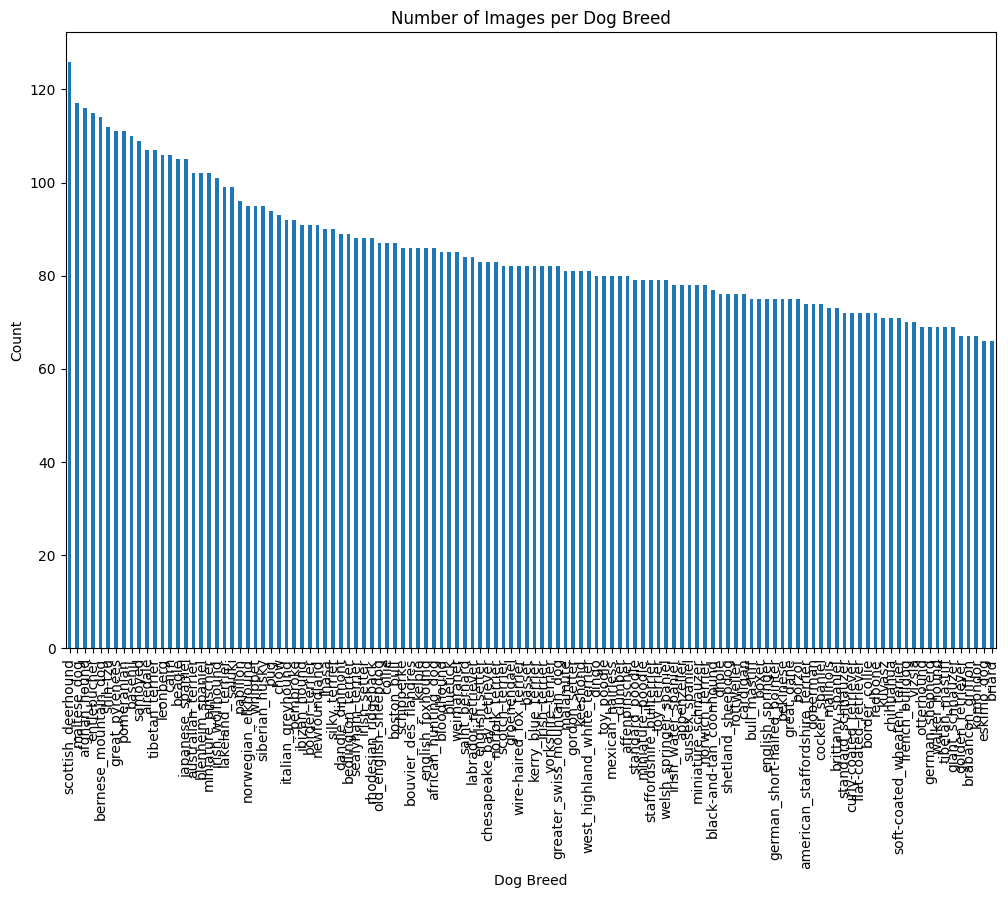

In [12]:


# Plotting the number of occurrences for each breed
plt.figure(figsize=(12, 8))
breed_counts.plot(kind='bar')
plt.title('Number of Images per Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()


Here we are finding out the count per class i.e. total data in each class using value_counts() function.

In [13]:
# Defining the three dog breeds to work with due to computational limitations
CLASS_NAMES = ['scottish_deerhound', 'maltese_dog', 'bernese_mountain_dog']

# Filtering the labels DataFrame to include only the selected breeds
labels = labels_all[labels_all['breed'].isin(CLASS_NAMES)]

# Resetting the index of the filtered DataFrame for better handling
labels = labels.reset_index(drop=True)

# Displaying the first few records of the filtered DataFrame
labels.head()


,id,breed
0,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


We will work on only 3 breeds due to limited computational power. You can consider more classes as per your system computational power.

In [14]:
from tqdm import tqdm

# Create a numpy matrix filled with zeros to store image data
# The shape is (number of images, height, width, color channels)
# We use 224x224 for the image size and 3 for the RGB color channels
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')

# One-hot encode the labels to convert breed names into binary class matrices
Y_data = label_binarize(labels['breed'], classes=CLASS_NAMES)

# Loop through each image in the dataset
for i in tqdm(range(len(labels))):
    # Load the image and resize it to 224x224 pixels
    img = image.load_img('dog_dataset/train/%s.jpg' % labels['id'][i], target_size=(224, 224))

    # Convert the image to a numpy array
    img = image.img_to_array(img)

    # Expand the dimensions of the image array to match the shape expected by the model
    x = np.expand_dims(img.copy(), axis=0)

    # Normalize the image data to be in the range [0, 1] by dividing by 255.0
    X_data[i] = x / 255.0

# Print the shape and size of the train images array
print('\nTrain Images shape: ', X_data.shape, ' size: {:,}'.format(X_data.size))

# Print the shape and size of the one-hot encoded labels array
print('One-hot encoded output shape: ', Y_data.shape, ' size: {:,}'.format(Y_data.size))


100%|██████████| 357/357 [00:01<00:00, 355.27it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


As we are working with the classification dataset first we need to one hot encode the target value i.e. the classes. After that we will read images and convert them into numpy array and finally normalizing the array.

In [15]:
from keras.regularizers import l2

# Building the Convolutional Neural Network (CNN) model
model = Sequential()

# Adding the first Convolutional layer with 64 filters, a kernel size of 5x5, ReLU activation, and input shape of 224x224x3
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)))

# Adding a Max Pooling layer with a pool size of 2x2
model.add(MaxPool2D(pool_size=(2, 2)))

# Adding a second Convolutional layer with 32 filters, a kernel size of 3x3, ReLU activation, and L2 regularization
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))

# Adding another Max Pooling layer with a pool size of 2x2
model.add(MaxPool2D(pool_size=(2, 2)))

# Adding a third Convolutional layer with 16 filters, a kernel size of 7x7, ReLU activation, and L2 regularization
model.add(Conv2D(filters=16, kernel_size=(7, 7), activation='relu', kernel_regularizer=l2(0.01)))

# Adding another Max Pooling layer with a pool size of 2x2
model.add(MaxPool2D(pool_size=(2, 2)))

# Adding a fourth Convolutional layer with 8 filters, a kernel size of 5x5, ReLU activation, and L2 regularization
model.add(Conv2D(filters=8, kernel_size=(5, 5), activation='relu', kernel_regularizer=l2(0.01)))

# Adding another Max Pooling layer with a pool size of 2x2
model.add(MaxPool2D(pool_size=(2, 2)))

# Flattening the output of the last Max Pooling layer to prepare it for the Fully Connected layers
model.add(Flatten())

# Adding the first Fully Connected (Dense) layer with 128 units, ReLU activation, and L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))

# Adding a second Fully Connected (Dense) layer with 64 units, ReLU activation, and L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Adding the output layer with the number of units equal to the number of classes, using Softmax activation
model.add(Dense(len(CLASS_NAMES), activation='softmax'))

# Compiling the model with categorical crossentropy loss, Adam optimizer with a learning rate of 0.0001, and accuracy as a metric
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Displaying the summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 16)        0

The network architecture for the Dog Breed prediction model consists of Conv2D layers to create convolutional kernels for feature detection, MaxPooling2D layers for downsampling by taking the maximum value over defined windows, a Flatten layer to convert multi-dimensional inputs into a 1D output, and Dense layers to produce the final output by performing a dot product of the input and kernel, with ReLU activation for non-linearity and softmax activation in the output layer for class probabilities.

After defining the network architecture we found out the total parameters as 162,619.

In [16]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training+validation and testing sets
# 10% of the data will be used for testing
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size=0.1)

# Splitting the training+validation set into training and validation sets
# 20% of the training+validation data will be used for validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size=0.2)

# Printing the shapes of the resulting datasets to verify the splits
print("Training data shape: ", X_train.shape, Y_train.shape)
print("Validation data shape: ", X_val.shape, Y_val.shape)
print("Testing data shape: ", X_test.shape, Y_test.shape)


Training data shape:  (256, 224, 224, 3) (256, 3)
Validation data shape:  (65, 224, 224, 3) (65, 3)
Testing data shape:  (36, 224, 224, 3) (36, 3)


After defining the network architecture we will start with splitting the test and train data then dividing train data in train and validation data.

In [17]:
# Defining the number of epochs (iterations over the entire training data) and batch size (number of samples per gradient update)
epochs = 100
batch_size = 128

# Training the model with the training data
# 'X_train' and 'Y_train' are the training images and their corresponding one-hot encoded labels
# 'batch_size' is the number of samples per gradient update
# 'epochs' is the number of complete passes through the training dataset
# 'validation_data' is the data on which to evaluate the loss and metrics at the end of each epoch
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, Y_val))

# Printing the history keys to see what metrics were recorded during training
print(history.history.keys())


Epoch 1/100
2/2 [==============================] - 38s 19s/step - loss: 4.9088 - accuracy: 0.3633 - val_loss: 4.9055 - val_accuracy: 0.2154
Epoch 2/100
2/2 [==============================] - 36s 18s/step - loss: 4.8784 - accuracy: 0.3594 - val_loss: 4.8724 - val_accuracy: 0.2308
Epoch 3/100
2/2 [==============================] - 38s 21s/step - loss: 4.8516 - accuracy: 0.3477 - val_loss: 4.8436 - val_accuracy: 0.2462
Epoch 4/100
2/2 [==============================] - 34s 18s/step - loss: 4.8252 - accuracy: 0.3672 - val_loss: 4.8183 - val_accuracy: 0.2769
Epoch 5/100
2/2 [==============================] - 38s 22s/step - loss: 4.7990 - accuracy: 0.3867 - val_loss: 4.7941 - val_accuracy: 0.2769
Epoch 6/100
2/2 [==============================] - 34s 18s/step - loss: 4.7725 - accuracy: 0.4062 - val_loss: 4.7688 - val_accuracy: 0.2923
Epoch 7/100
2/2 [==============================] - 36s 19s/step - loss: 4.7459 - accuracy: 0.4375 - val_loss: 4.7430 - val_accuracy: 0.3077
Epoch 8/100
2/2 [===

Now we will train our model on 100 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

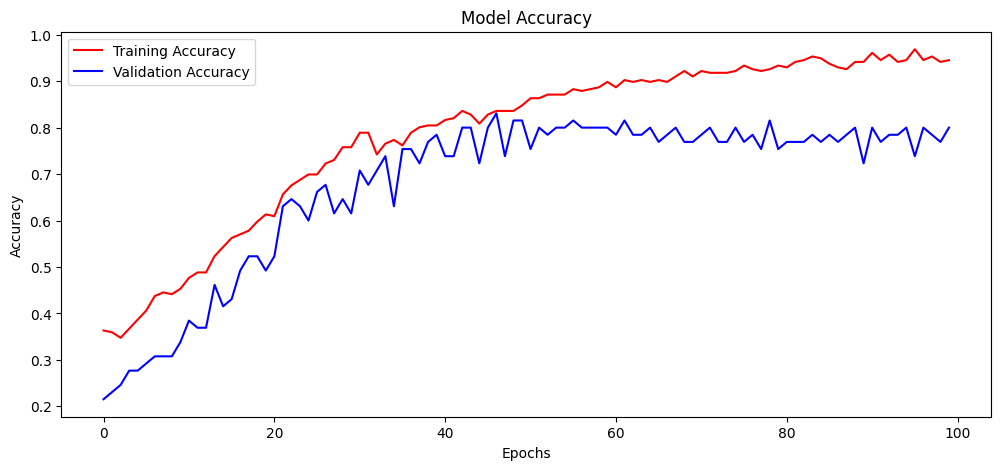

In [18]:
# Plotting the training history to visualize model performance over epochs
plt.figure(figsize=(12, 5))

# Plotting training accuracy
plt.plot(history.history['accuracy'], color='r', label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history.history['val_accuracy'], color='b', label='Validation Accuracy')

# Adding title and labels
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

# Adding legend to differentiate between training and validation accuracy
plt.legend(['Training Accuracy', 'Validation Accuracy'])

# Displaying the plot
plt.show()


Here we analyse how the model is learning with each epoch in terms of accuracy.

In [19]:
# Predicting the labels for the test set
# 'Y_pred' will contain the predicted probabilities for each class
Y_pred = model.predict(X_test)

# Evaluating the model on the test set
# 'score' will contain the loss and accuracy of the model on the test set
score = model.evaluate(X_test, Y_test)

# Printing the accuracy over the test set
# 'score[1]' contains the accuracy since 'score' is a list of metrics returned by 'model.evaluate'
# The accuracy is multiplied by 100 and rounded to 2 decimal places for better readability
print('Accuracy over the test set: \n', round((score[1] * 100), 2), '%')


2/2 [==============================] - 3s 229ms/step - loss: 3.2141 - accuracy: 0.7222
Accuracy over the test set: 
 72.22 %


We will use predict function to make predictions using this model also we are finding out the accuracy on the test set.

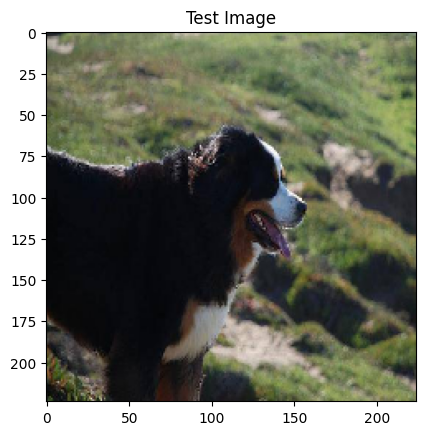

Originally:  bernese_mountain_dog


In [23]:

# Plotting an image from the test set
plt.imshow(X_test[1, :, :, :])
plt.title('Test Image')
plt.show()

# Finding the breed with the highest predicted probability and comparing it to the original breed
original_breed_index = np.argmax(Y_test[1])  # Index of the original breed
predicted_breed_index = np.argmax(Y_pred[1])  # Index of the predicted breed

# Printing the original breed and the predicted breed
print("Originally: ", CLASS_NAMES[original_breed_index])



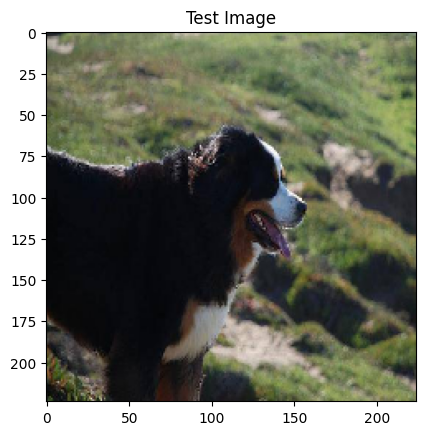

Predicted:  bernese_mountain_dog


In [25]:
# Plotting an image from the test set
plt.imshow(X_test[1, :, :, :])
plt.title('Test Image')
plt.show()

# Finding the breed with the highest predicted probability and comparing it to the original breed
predicted_breed_index = np.argmax(Y_pred[1])  # Index of the predicted breed


print("Predicted: ", CLASS_NAMES[predicted_breed_index])

Here you can see image with its original and predicted label.

## Conclusion:

We started with downloading the dataset creating the model and finding out the predictions using the model. We can optimize different hyper parameters in order to tune this model for a higher accuracy. This model can be used to predict different breeds of dogs which can be further used by different NGO's working on saving animals and for educational purposes also.